✅ RMSE after log-transform: 337,415,791.09


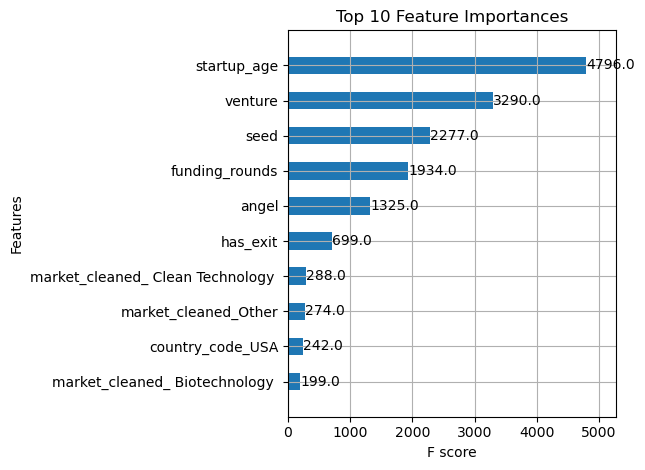

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb

# -------------------------------
# Step 1: Load and preprocess data
# -------------------------------
df = pd.read_csv('startup_merged.csv')

# Drop rows with missing funding amount
df = df.dropna(subset=['funding_total_usd'])

# Log-transform the target to reduce skew
df['log_funding'] = np.log1p(df['funding_total_usd'])  # log(1 + x)

# Define features
features = ['startup_age', 'funding_rounds', 'seed', 'venture', 'angel',
            'country_code', 'market_cleaned', 'has_exit']

# Create X and y
X = df[features]
y = df['log_funding']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['country_code', 'market_cleaned'])

# -------------------------------
# Step 2: Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# Step 3: Train XGBoost Model
# -------------------------------
model = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# -------------------------------
# Step 4: Predict and Evaluate
# -------------------------------
# Predict log scale
y_pred_log = model.predict(X_test)

# Inverse transform to get actual predicted funding
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

# Evaluate RMSE
rmse = root_mean_squared_error(y_test_actual, y_pred_actual)
print(f"✅ RMSE after log-transform: {rmse:,.2f}")

# -------------------------------
# Step 5: Plot Feature Importance
# -------------------------------
xgb.plot_importance(model, max_num_features=10, height=0.5)
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()
